In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from matplotlib.colors import ListedColormap

In [20]:
class Perceptron:
    def __init__(self, eta=0.01, n_iter=50, random_state=None, alpha=0.1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        self.alpha = alpha
        self.w_ = None
        self.train_errors_ = []
        self.test_errors_ = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.sigmoid(self.net_input(X)) >= 0.5, 1, -1)

    def fit(self, X, y):
        if self.random_state:
            np.random.seed(self.random_state)

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        self.train_errors_ = []
        self.test_errors_ = []

        for i in range(self.n_iter):
            errors = 0
            
            for xi, yi in zip(X, y):
                update = self.eta * (yi - self.predict(xi))
                self.w_[1:] += update * xi - self.alpha * self.w_[1:]
                self.w_[0] += update
                errors += int(update != 0.0)
            
            self.errors_.append(errors)

        for _ in range(self.n_iter):
            train_errors = 0

            for xi, yi in zip(X, y):
                output = self.predict(xi)
                error = yi - output
                update = self.eta * error * self.sigmoid(self.net_input(xi)) * (1 - self.sigmoid(self.net_input(xi)))
                self.w_[1:] += update * xi - self.alpha * self.w_[1:]
                self.w_[0] += update
                train_errors += int(error != 0.0)

            test_errors = 0
            for xi, yi in zip(X_test, y_test):
                prediction = self.predict(xi)
                test_errors += int(prediction != yi)

            self.train_errors_.append(train_errors)
            self.test_errors_.append(test_errors)

        return self

In [21]:
# Загрузка данных
iris = load_iris()
X = iris.data[:, [0, 2]]  # Выбор параметров sepal length и petal length
y = iris.target

In [22]:
# Выбор классов setosa и versicolor
X = X[:100]
y = y[:100]
y[y == 0] = -1

In [23]:
# разбиваем датасет на тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [24]:
# Создание экземпляра классификатора перцептрона
ppn2 = Perceptron(eta=0.1, n_iter=1000)
ppn2.fit(X_train, y_train)

ppn2m = Perceptron(eta=0.1, n_iter=100,random_state=1)
ppn2m.fit(X_train, y_train)

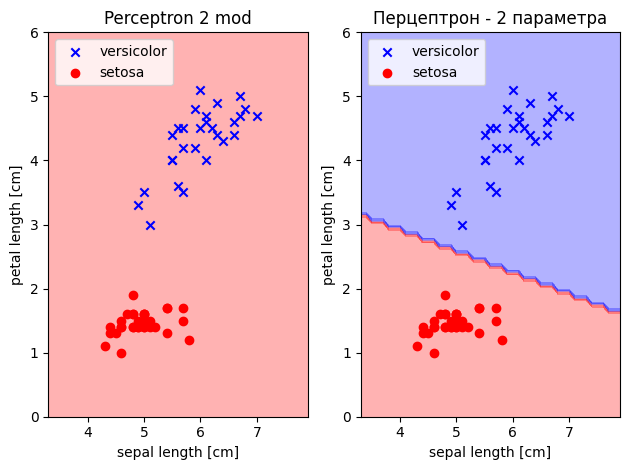

In [25]:
# Построение границ принятия решения и точек данных для линейной модели SVC с 2 параметрами
cmap = ListedColormap(['#FF0000', '#0000FF'])
markers = ('s', 'x', 'o', '^', 'v')

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z_ppn2M = ppn2m.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z_ppn2M = Z_ppn2M.reshape(xx1.shape)

plt.subplot(121)
plt.contourf(xx1, xx2, Z_ppn2M, alpha=0.3, cmap=cmap)
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='blue', marker='x', label='versicolor')
plt.scatter(X_train[y_train == -1, 0], X_train[y_train == -1, 1], color='red', marker='o', label='setosa')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.title('Perceptron 2 mod')

# Построение границ принятия решения и точек данных для перцептрона с 2 параметрами
Z_ppn2 = ppn2.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z_ppn2 = Z_ppn2.reshape(xx1.shape)

plt.subplot(122)
plt.contourf(xx1, xx2, Z_ppn2, alpha=0.3, cmap=cmap)
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='blue', marker='x', label='versicolor')
plt.scatter(X_train[y_train == -1, 0], X_train[y_train == -1, 1], color='red', marker='o', label='setosa')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.title('Перцептрон - 2 параметра')

plt.tight_layout()
plt.show()

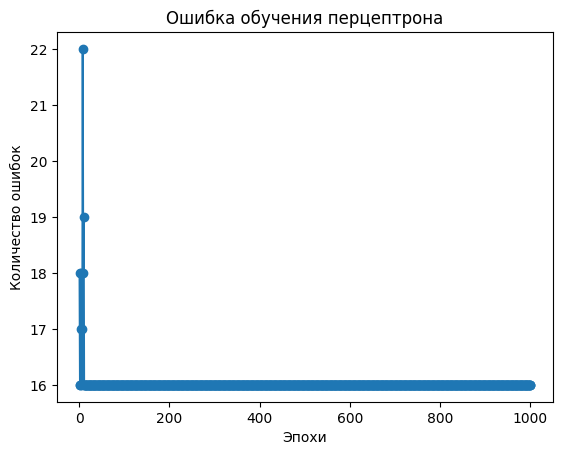

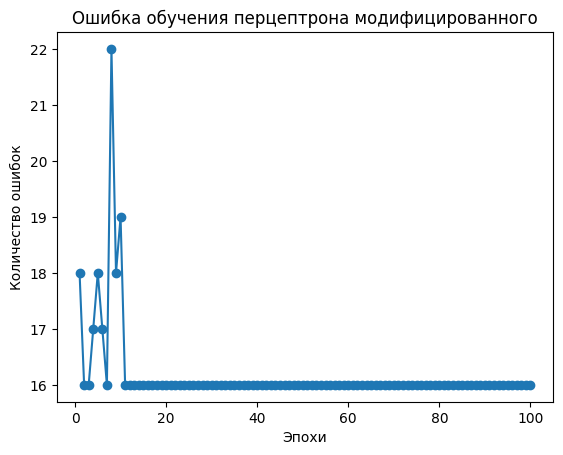

In [26]:
plt.plot(range(1, len(ppn2.errors_) + 1), ppn2.errors_, marker='o')
plt.xlabel('Эпохи')
plt.ylabel('Количество ошибок')
plt.title('Ошибка обучения перцептрона')
plt.show()

plt.plot(range(1, len(ppn2m.errors_) + 1), ppn2m.errors_, marker='o')
plt.xlabel('Эпохи')
plt.ylabel('Количество ошибок')
plt.title('Ошибка обучения перцептрона модифицированного')
plt.show()

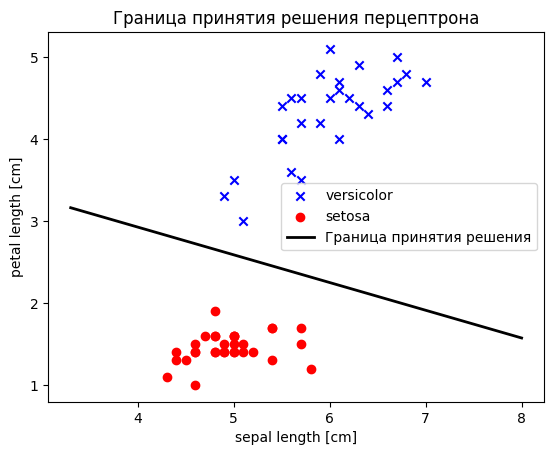

In [27]:
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='blue', marker='x', label='versicolor')
plt.scatter(X_train[y_train == -1, 0], X_train[y_train == -1, 1], color='red', marker='o', label='setosa')
# Построение границы принятия решения (прямая линия)
x_boundary = np.array([X_train[:, 0].min() - 1, X_train[:, 0].max() + 1])
y_boundary = -(ppn2.w_[0] + ppn2.w_[1] * x_boundary) / ppn2.w_[2]
plt.plot(x_boundary, y_boundary, color='black', linewidth=2, label='Граница принятия решения')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend()
plt.title('Граница принятия решения перцептрона')
plt.show()

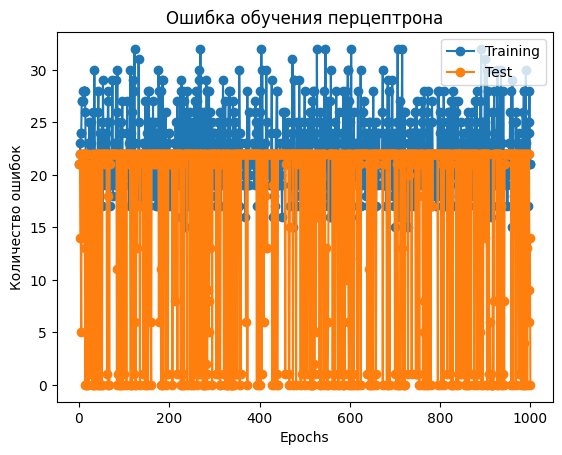

In [28]:
plt.plot(range(1, len(ppn2.train_errors_) + 1), ppn2.train_errors_, marker='o', label='Training')
plt.plot(range(1, len(ppn2.test_errors_) + 1), ppn2.test_errors_, marker='o', label='Test')
plt.xlabel('Epochs')
plt.ylabel('Количество ошибок')
plt.title('Ошибка обучения перцептрона')
plt.legend()
plt.show()

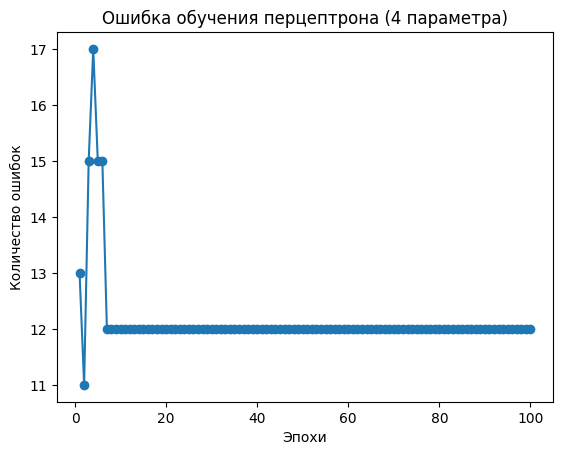

In [29]:
#4 param

iris = load_iris()
X = iris.data[:, [0, 1, 2, 3]]
y = iris.target

X = X[:100]
y = y[:100]
y[y == 0] = -1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

ppn4 = Perceptron(eta=0.1, n_iter=100)
ppn4.fit(X_train, y_train)

plt.plot(range(1, len(ppn4.errors_) + 1), ppn4.errors_, marker='o')
plt.xlabel('Эпохи')
plt.ylabel('Количество ошибок')
plt.title('Ошибка обучения перцептрона (4 параметра)')
plt.show()

In [30]:
iris = load_iris()
X = iris.data[50:, [0, 2]]
y = iris.target[50:]

X = X[:100]
y = y[:100]
y[y == 0] = -1
y[y == 1] = -1
y[y == 2] = 1

In [31]:
# Определение класса Perceptron с сигмоидной активацией и методами fit и predict.
class Perceptron:
    def __init__(self, eta=0.01, n_iter=50, random_state=None, alpha=0.1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        self.alpha = alpha
        self.w_ = None
        self.train_errors_ = []
        self.test_errors_ = []
        
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:].reshape(-1, 1)) + self.w_[0]

    def predict(self, X):
        return np.where(self.sigmoid(self.net_input(X)) >= 0.5, 1, -1)

    
    def fit(self, X, y):
        if self.random_state:
            np.random.seed(self.random_state)
            
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        self.train_errors_ = []
        self.test_errors_ = []
        
        for i in range(self.n_iter):
            errors = 0
            
            for xi, yi in zip(X, y):
                update = self.eta * (yi - self.predict(xi))
                self.w_[1:] += update * xi - self.alpha * self.w_[1:]
                self.w_[0] += update
                errors += int(update != 0.0)
            
            self.errors_.append(errors)
        
        for _ in range(self.n_iter):
            train_errors = 0
            
            for xi, yi in zip(X_train, y_train):
                update = self.eta * (yi - self.predict(xi))
                self.w_[1:] += update * xi - self.alpha * self.w_[1:]
                self.w_[0] += update
                train_errors += int(update != 0.0)
            
            test_errors = 0
            for xi, yi in zip(X_test, y_test):
                prediction = self.predict(xi)
                test_errors += int(prediction != yi)
            
            self.train_errors_.append(train_errors)
            self.test_errors_.append(test_errors)
        
        return self


In [32]:
# разделяем датасет
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

# Создание экземпляра классификатора перцептрона
ppn2 = Perceptron(eta=0.1, n_iter=1000)
ppn2.fit(X_train, y_train)

ppn2m = Perceptron(eta=0.1, n_iter=100, random_state=True)
ppn2m.fit(X_train, y_train)

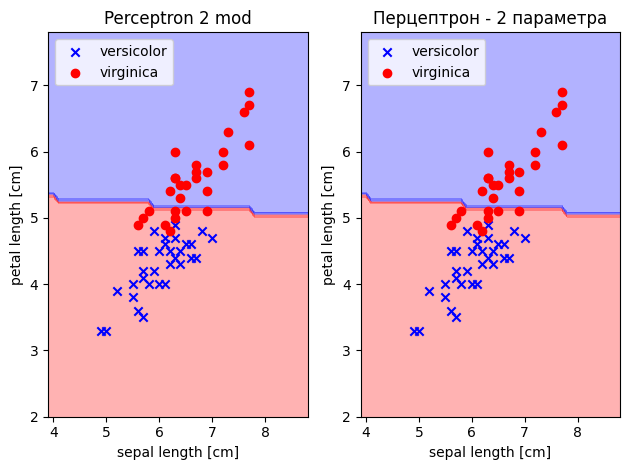

In [33]:
# Построение границ принятия решения и точек данных для линейной модели SVC с 2 параметрами
cmap = ListedColormap(['#FF0000', '#0000FF'])
markers = ('s', 'x', 'o', '^', 'v')

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z_ppn2M = ppn2m.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z_ppn2M = Z_ppn2M.reshape(xx1.shape)

plt.subplot(121)
plt.contourf(xx1, xx2, Z_ppn2M, alpha=0.3, cmap=cmap)
plt.scatter(X_train[y_train == -1, 0], X_train[y_train == -1, 1], color='blue', marker='x', label='versicolor')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='red', marker='o', label='virginica')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.title('Perceptron 2 mod')

# Построение границ принятия решения и точек данных для перцептрона с 2 параметрами
Z_ppn2 = ppn2.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z_ppn2 = Z_ppn2.reshape(xx1.shape)

plt.subplot(122)
plt.contourf(xx1, xx2, Z_ppn2, alpha=0.3, cmap=cmap)
plt.scatter(X_train[y_train == -1, 0], X_train[y_train == -1, 1], color='blue', marker='x', label='versicolor')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='red', marker='o', label='virginica')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.title('Перцептрон - 2 параметра')

plt.tight_layout()
plt.show()

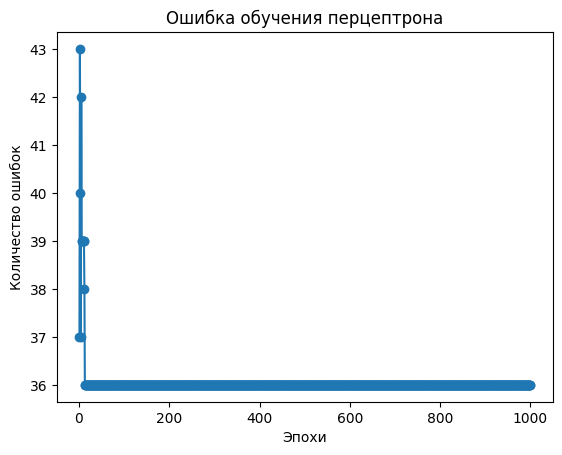

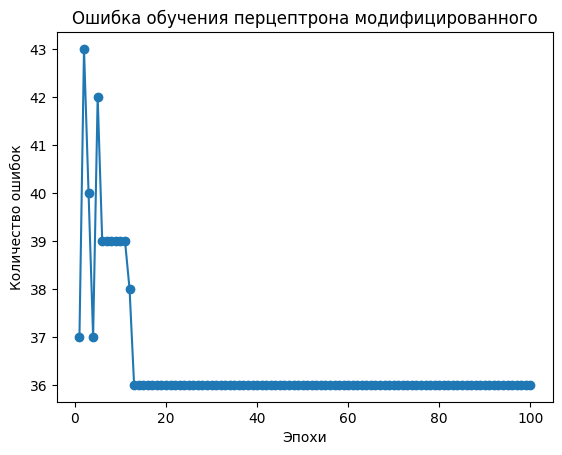

In [34]:
plt.plot(range(1, len(ppn2.errors_) + 1), ppn2.errors_, marker='o')
plt.xlabel('Эпохи')
plt.ylabel('Количество ошибок')
plt.title('Ошибка обучения перцептрона')
plt.show()

plt.plot(range(1, len(ppn2m.errors_) + 1), ppn2m.errors_, marker='o')
plt.xlabel('Эпохи')
plt.ylabel('Количество ошибок')
plt.title('Ошибка обучения перцептрона модифицированного')
plt.show()

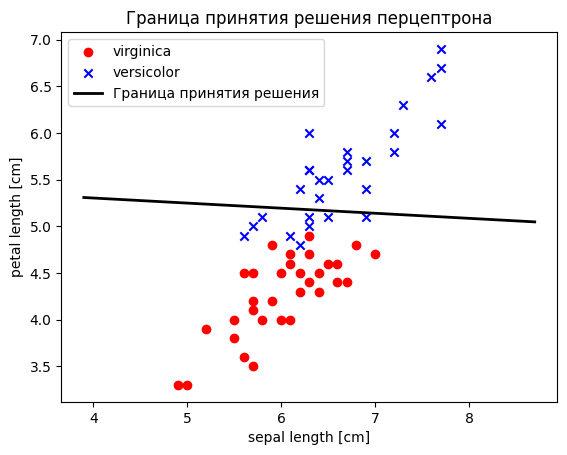

In [35]:
plt.scatter(X_train[y_train == -1, 0], X_train[y_train == -1, 1], color='red', marker='o', label='virginica')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='blue', marker='x', label='versicolor')

# Построение границы принятия решения (прямая линия)
x_boundary = np.array([X_train[:, 0].min() - 1, X_train[:, 0].max() + 1])
y_boundary = -(ppn2.w_[0] + ppn2.w_[1] * x_boundary) / ppn2.w_[2]
plt.plot(x_boundary, y_boundary, color='black', linewidth=2, label='Граница принятия решения')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend()
plt.title('Граница принятия решения перцептрона')
plt.show()

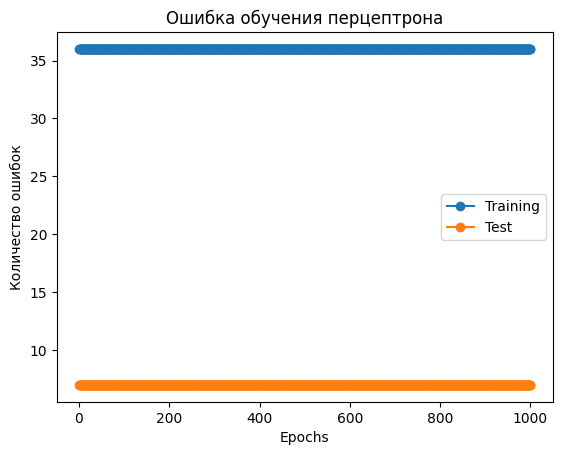

In [36]:
plt.plot(range(1, len(ppn2.train_errors_) + 1), ppn2.train_errors_, marker='o', label='Training')
plt.plot(range(1, len(ppn2.test_errors_) + 1), ppn2.test_errors_, marker='o', label='Test')
plt.xlabel('Epochs')
plt.ylabel('Количество ошибок')
plt.title('Ошибка обучения перцептрона')
plt.legend()
plt.show()

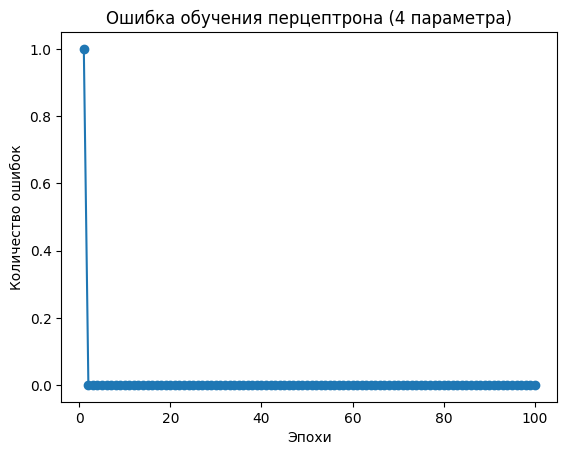

In [37]:
# 4 param

iris = load_iris()
X = iris.data[:, [0, 1, 2, 3]]
y = iris.target

X = X[:100]
y = y[:100]
y[y == 0] = -1
y[y == 1] = -1
y[y == 2] = 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

ppn4 = Perceptron(eta=0.1, n_iter=100)
ppn4.fit(X_train, y_train)

plt.plot(range(1, len(ppn4.errors_) + 1), ppn4.errors_, marker='o')
plt.xlabel('Эпохи')
plt.ylabel('Количество ошибок')
plt.title('Ошибка обучения перцептрона (4 параметра)')
plt.show()